In [1]:
import os
import datetime as dt
from datetime import date
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from pprint import pprint
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

pd.set_option('max_columns', 330)
pd.set_option('max_rows', 1000)

In [2]:
%matplotlib inline
# plt.style.use('ggplot')

# Load DataFrames

In [3]:
input_path = r'C:\Users\Panagiotis.Mavritsak\Desktop\Ner thesis\\'
df = pd.read_excel(input_path+'data.xlsx', index_col=0)
df = df.resample('M', label='right').mean()
df

,Aluminium (USD/tonne),Copper (USD/pound),Zinc (USD/tonne),Nickel (USD/MT),Lead (USD/tonne),Tin (USD/tonne),Silver (USD/ t oz),Gold (USD/ t oz),Crude Oil WTI (USD/ bbl),Crude oil Brent (USD/bbl),Natural gas (USD/Mmbtu),USD index,DJIA (USD),FTSE 100 (GBP),Hang seng (HKD),US libor
Date,,,,,,,,,,,,,,,,
1995-01-31,2060.365000,1.400250,1156.515000,9605.200000,665.875000,6194.750000,4.753800,378.585000,17.973500,16.553000,1.430350,88.151500,3873.884000,3030.105000,7454.471000,6.339500
1995-02-28,1893.213333,1.340267,1022.873333,8360.866667,575.740000,5420.533333,4.702267,376.926667,18.545333,17.070000,1.438600,87.368667,3959.192667,3060.286667,7989.160000,6.260667
1995-03-31,1802.627273,1.390091,1023.109091,7536.363636,584.336364,5536.590909,4.658955,382.454545,18.574545,16.916818,1.535455,83.746818,4063.885000,3079.659091,8370.944545,6.268636
1995-04-30,1851.800000,1.335882,1062.082353,7403.882353,607.876471,5866.411765,5.533294,391.105882,19.916471,18.420588,1.660941,81.663529,4234.504118,3198.858824,8501.802353,6.235882
1995-05-31,1767.871429,1.281095,1036.171429,7275.476190,596.352381,5926.714286,5.512095,385.571429,19.714286,18.388571,1.709762,82.672381,4391.934286,3288.314286,8935.610476,6.127619
1995-06-30,1779.084211,1.377263,1009.310526,7902.421053,612.310526,6698.842105,5.337000,388.510526,18.393684,17.220526,1.637316,82.091579,4509.568947,3353.952632,9288.653158,6.003684
1995-07-31,1869.010526,1.380158,1028.131579,8628.473684,622.968421,6623.894737,5.154842,386.647368,17.256842,15.959474,1.494684,81.754737,4689.999474,3435.973684,9510.302632,5.888947
1995-08-31,1887.490909,1.378136,1014.809091,8929.727273,622.763636,6976.363636,5.377773,383.586364,17.812273,16.159545,1.553273,84.260909,4641.324091,3486.954545,9131.519545,5.905455
1995-09-30,1766.285000,1.321400,989.600000,8406.200000,593.245000,6353.800000,5.403350,383.880000,18.208000,16.510000,1.674500,85.630500,4746.759000,3534.850000,9516.144500,5.865500


check if values are missing

In [4]:
df.isnull().sum()

Aluminium (USD/tonne)        0
Copper (USD/pound)           0
Zinc (USD/tonne)             0
Nickel (USD/MT)              0
Lead (USD/tonne)             0
Tin (USD/tonne)              0
Silver (USD/ t oz)           0
Gold (USD/ t oz)             0
Crude Oil WTI (USD/ bbl)     0
Crude oil Brent (USD/bbl)    0
Natural gas (USD/Mmbtu)      0
USD index                    0
DJIA (USD)                   0
 FTSE 100 (GBP)              0
Hang seng (HKD)              0
 US libor                    0
dtype: int64

### Plot distributions

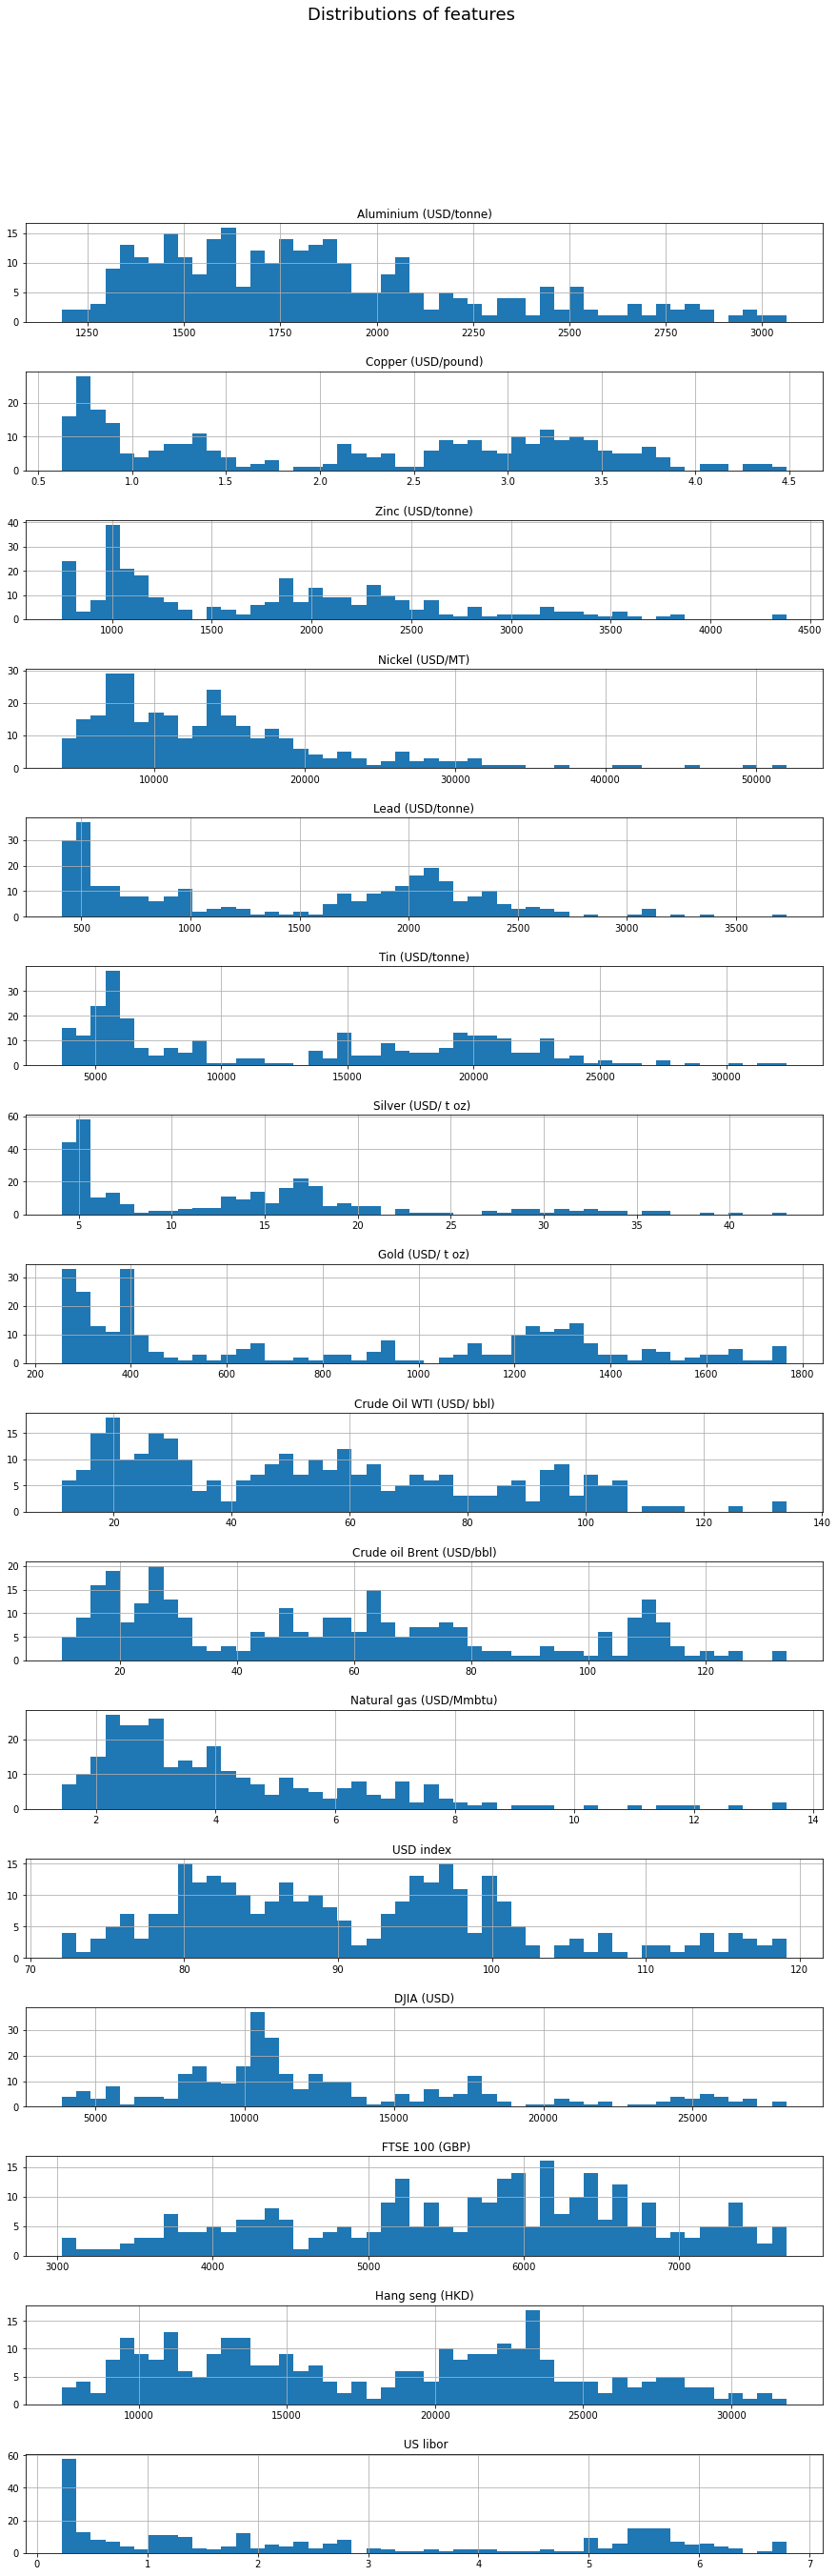

In [5]:
# define subplot grid
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 45))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distributions of features", fontsize=18, y=0.95)
for column, ax in zip(df.columns, axs.ravel()):  # no date or month plot
    df[column].hist(ax=ax, bins=50)

    # chart formatting
    ax.set_title(column)
    ax.set_xlabel("")

plt.show()

### Autocorrelation plots

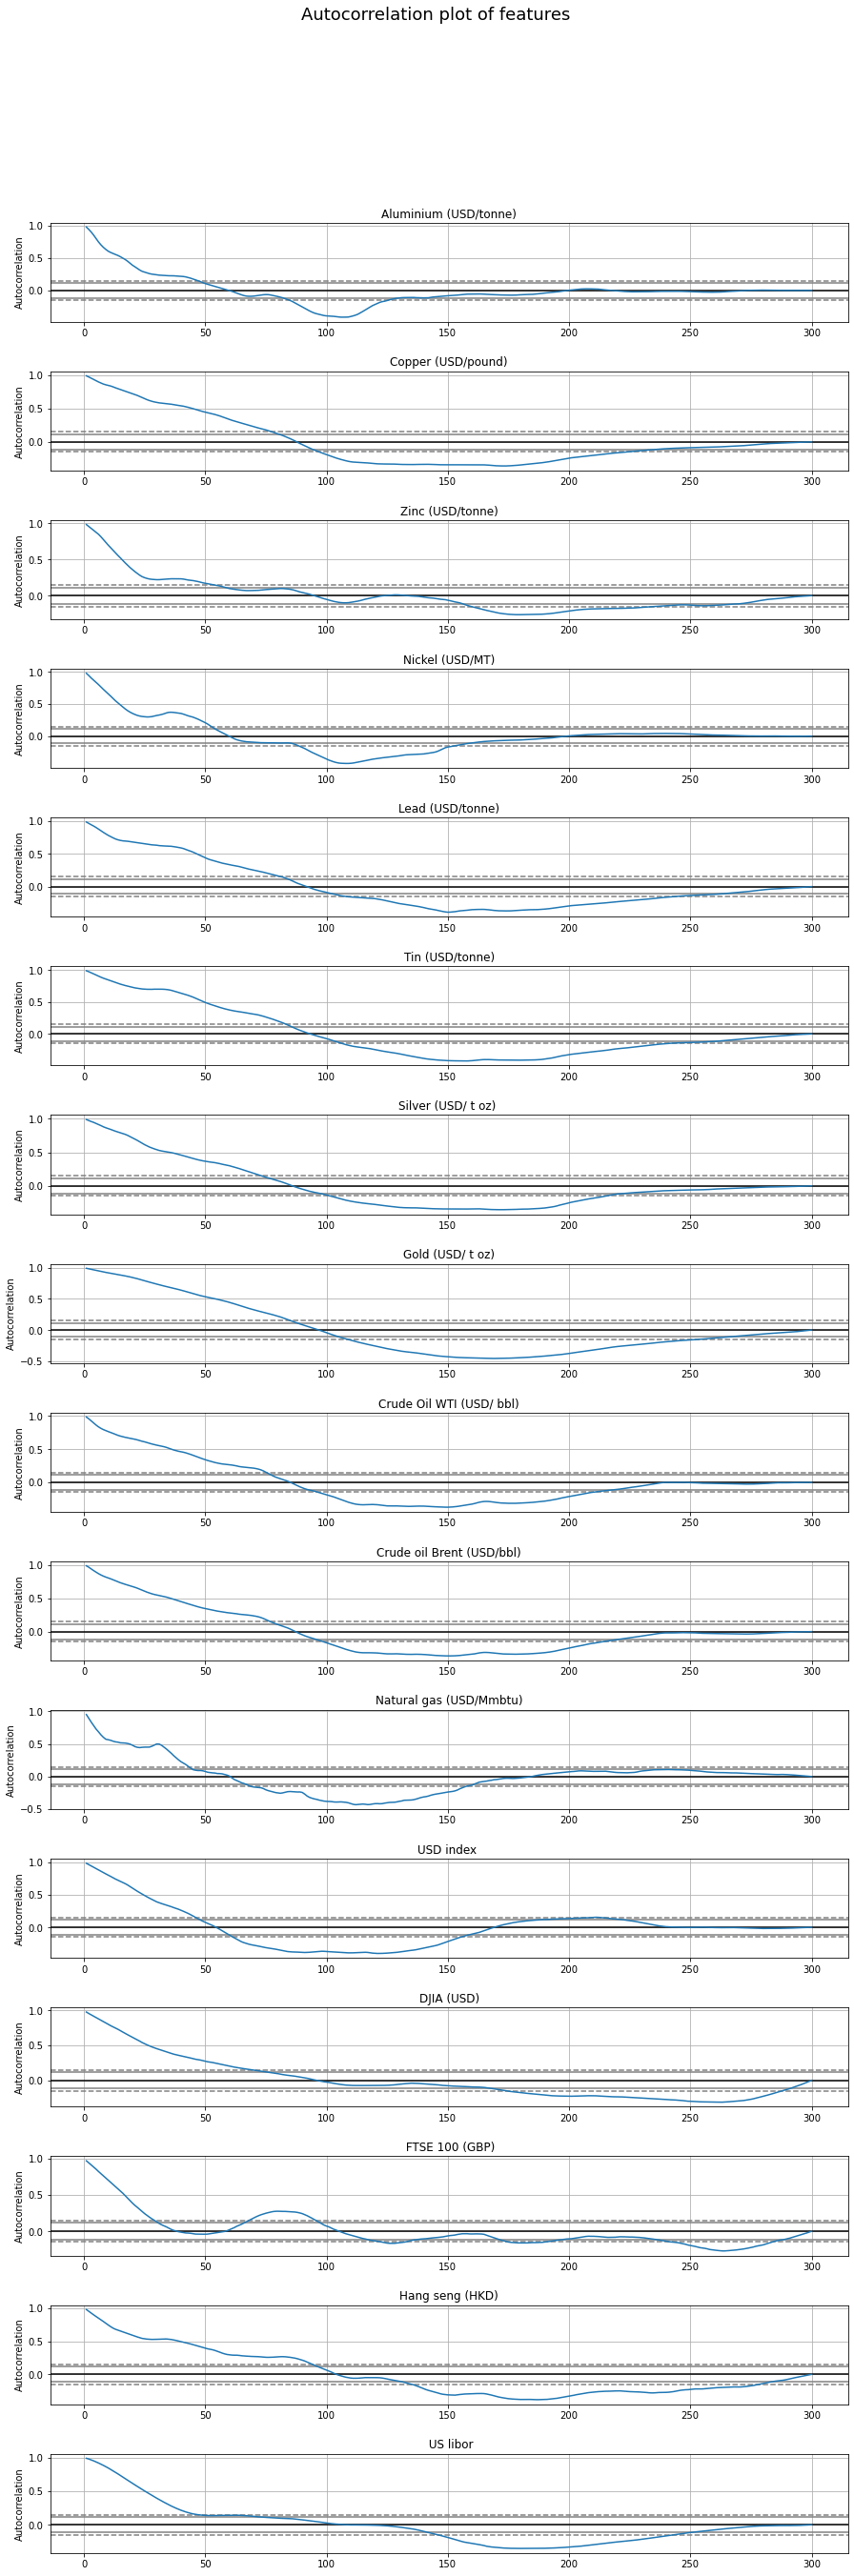

In [6]:
# define subplot grid
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 45))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Autocorrelation plot of features", fontsize=18, y=0.95)
for column, ax in zip(df.columns, axs.ravel()):  # no date or month plot
    pd.plotting.autocorrelation_plot(df[column], ax=ax)
    
    # chart formatting
    ax.set_title(column)
    ax.set_xlabel("")

plt.show()

### Time-series and correlation plots

Functions for anomalies and plotting

In [7]:
def calc_anom_df(df):
    '''Calculate daily anomolies based on average data throughout the full time series
    Returns: New pandas dataframe with anomoloies calculated for each variable
    '''
    anom_df = pd.DataFrame(data=df.index, columns=['Date'])
    anom_df.set_index('Date', inplace=True)
    var_list = list(df.columns)
    
    for var in var_list:
        anom_df[var] = df[var] - df.mean()[var]
    
    return(anom_df)

def var_plots(df, anomaly=False):
    '''Plot of volatility alongside with raw features
    Return: Time series plots of all variables
    '''
    if anomaly==True:
        title=f'Features ANOMALIES time-series'
    else:
        title=f'Features time-series'
        
    df.plot(subplots=True, figsize=(16,12), title=title)
    plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
    plt.xlabel('Date', fontsize = 14)
    plt.grid()
    
    if anomaly==True:
        title=f'Correlation map on ANOMALIES'
    else:
        title=f'Correlation map'
    
    corrmat = df.corr()
    fig, ax = plt.subplots(figsize=(14, 14))
    sns.heatmap(corrmat, vmax=1., square=True, cmap="rocket_r")
    plt.title(title, fontsize=15)
    plt.show()

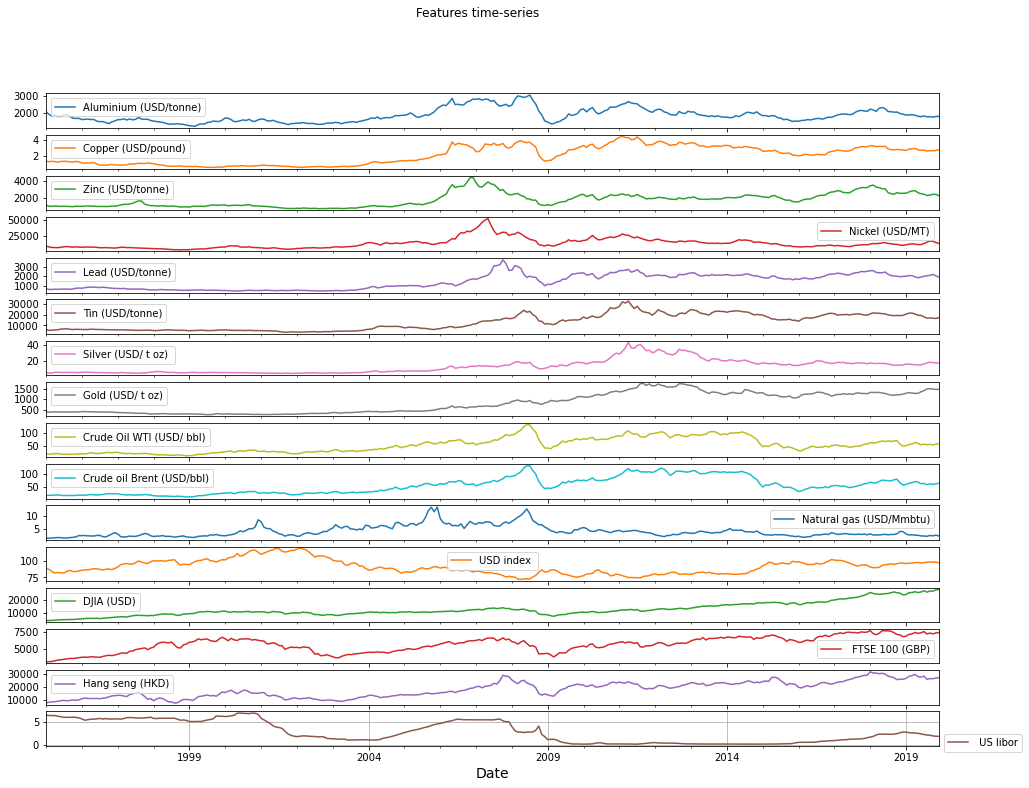

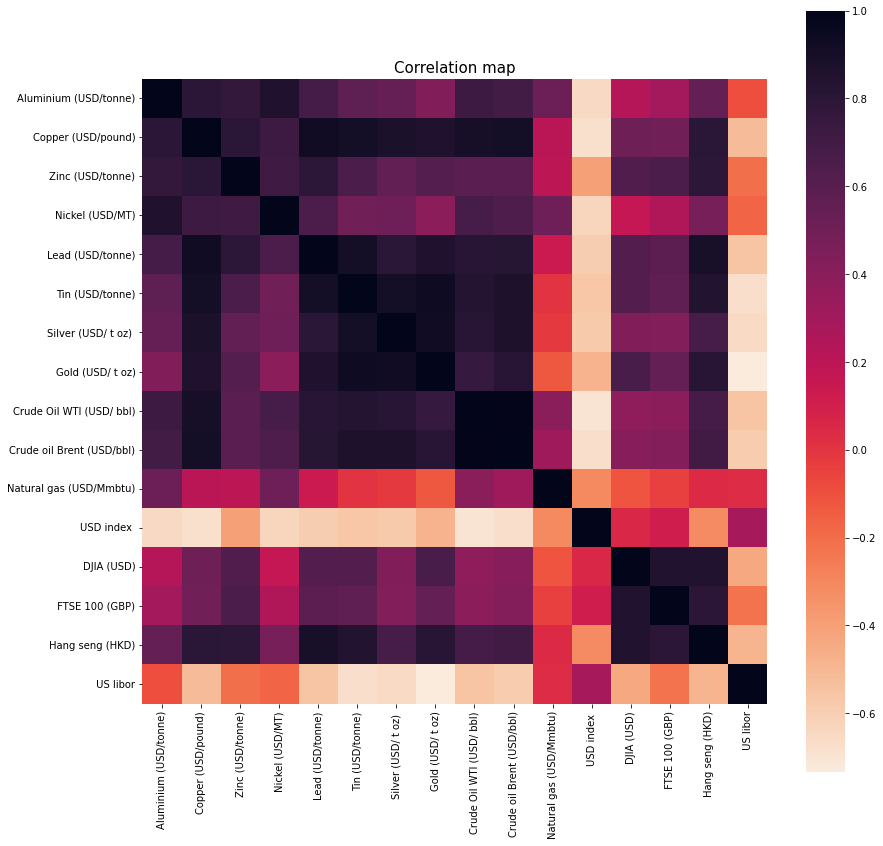

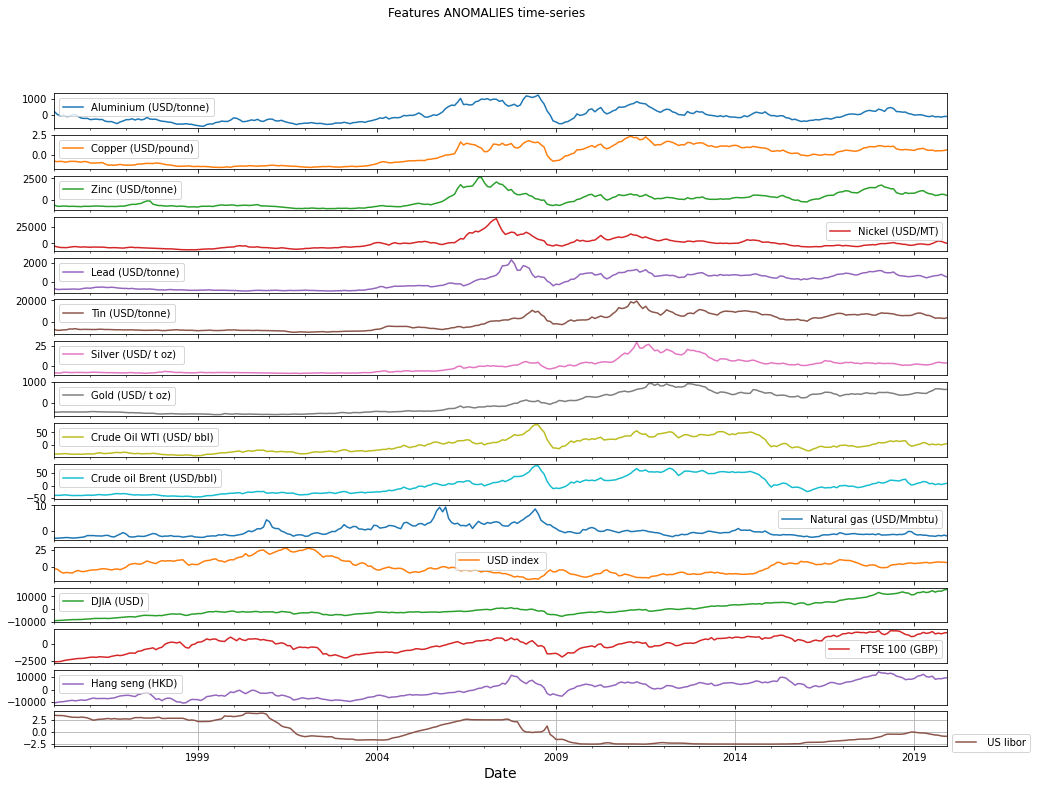

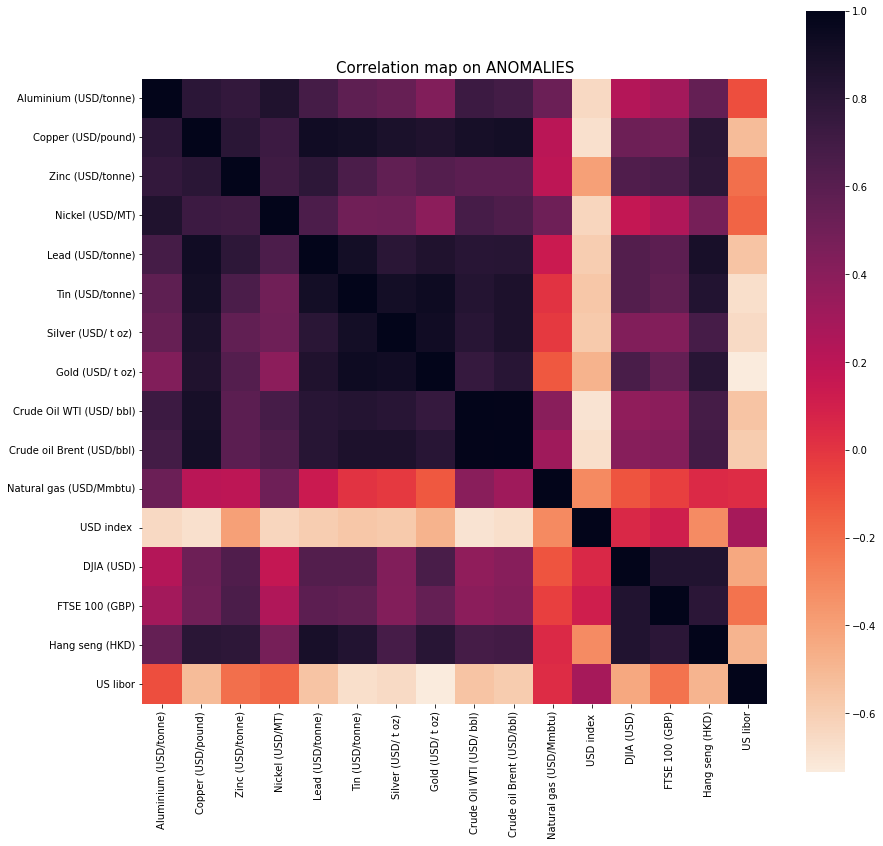

In [8]:
anom_df = calc_anom_df(df)

var_plots(df)
var_plots(anom_df, anomaly=True)

### Boxplots seasonal etc.

In [9]:
def season_plot(df, column):
    '''Produces plots for analysis of monthly malaria prevalence time series
    Arg1: dataframe produced from data preparation script, including 'malaria prevalence' column
    Returns: Time series plot, ACF plot, month-wise boxplot, year-wise boxplot
    '''
    season_df = df[['Date', column]]
    season_df['year'] = season_df.Date.dt.year
    season_df['month'] = season_df.Date.dt.month
    season_df = season_df.dropna()
    variable = column
    fig, ax = plt.subplots(figsize=(15, 6))

    palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
    sns.lineplot(x=season_df['month'], y=season_df[variable], hue=season_df['year'], palette='muted')
    ax.set_title('Seasonal plot of '+column, fontsize = 20, loc='center', fontdict=dict(weight='bold'))
    ax.set_xlabel('Month', fontsize = 16)
    ax.set_ylabel(column, fontsize = 16)
    ax.legend(loc='right')
    plt.show()

    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    sns.boxplot(x=season_df['month'], y=season_df[variable], ax=ax[0])
    ax[0].set_title('Month-wise Box Plot', fontsize = 20, loc='center')
    ax[0].set_xlabel('Month', fontsize = 16)
    ax[0].set_ylabel(column, fontsize = 16)
    
    sns.boxplot(x=season_df['year'], y=season_df[variable], ax=ax[1])
    ax[1].set_title('Year-wise Box Plot', fontsize = 20, loc='center')
    ax[1].set_xlabel('Year', fontsize = 16)
    ax[1].set_ylabel(column, fontsize = 16)
    plt.xticks(rotation=90)
    plt.show()

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


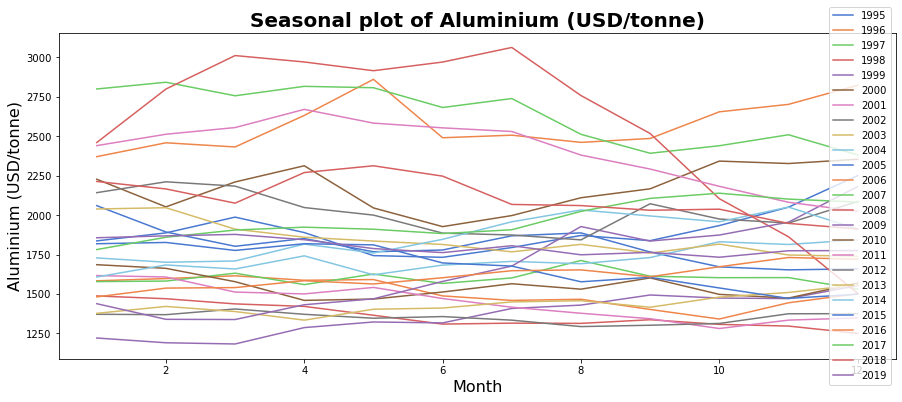

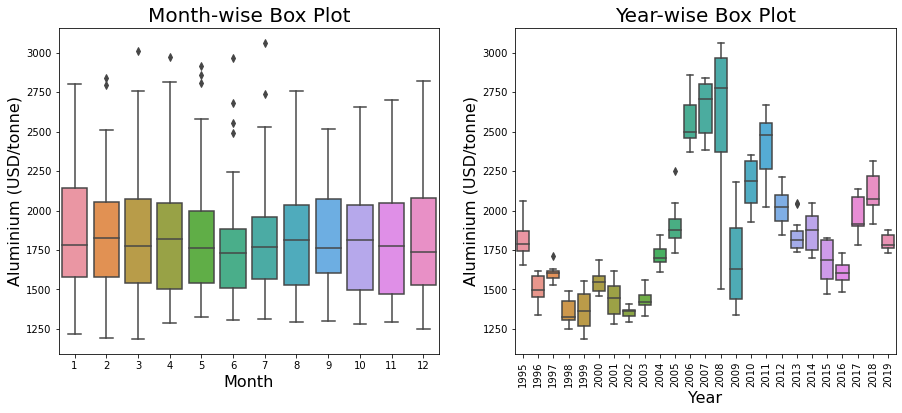

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


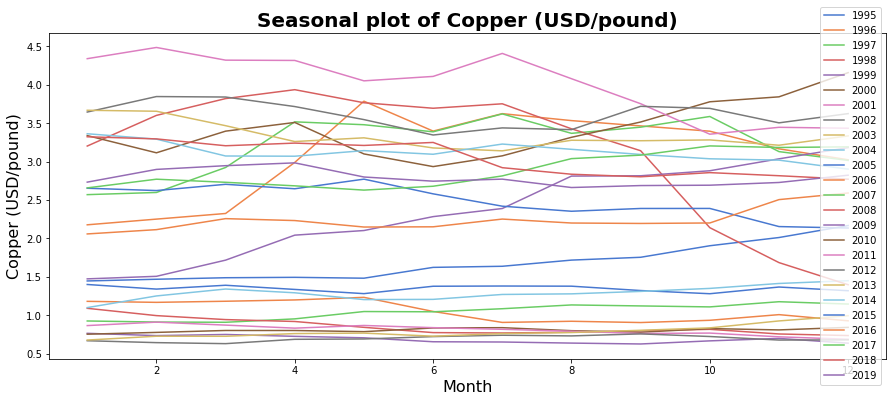

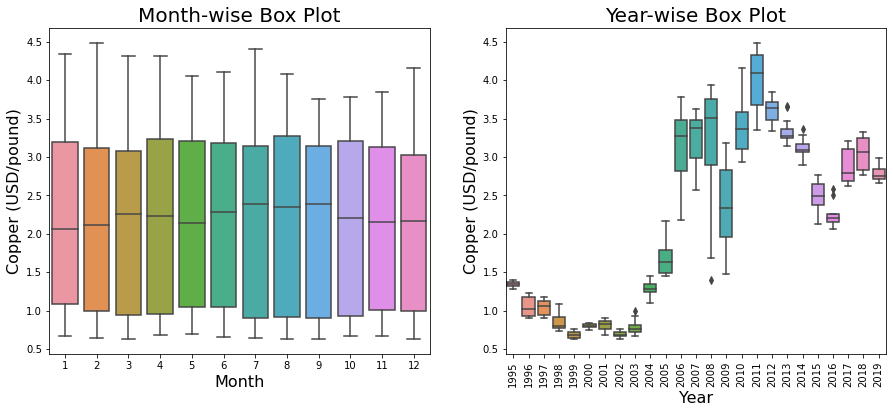

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


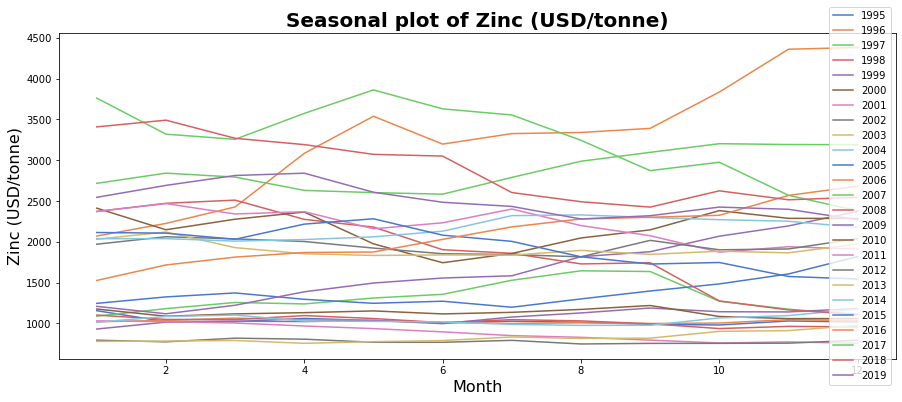

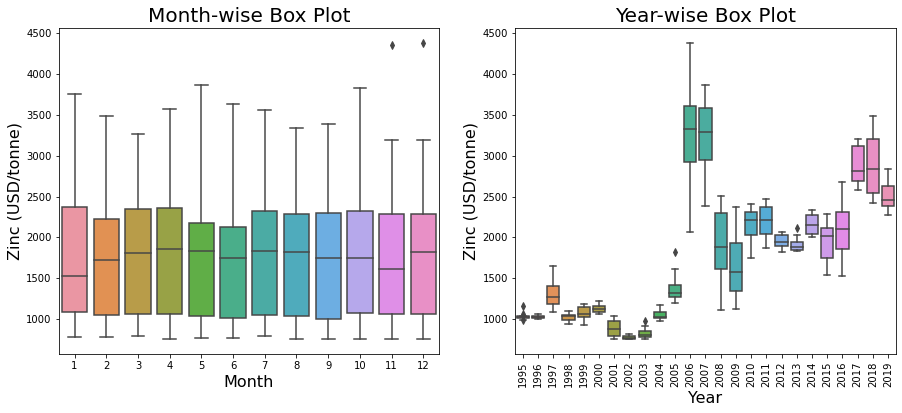

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


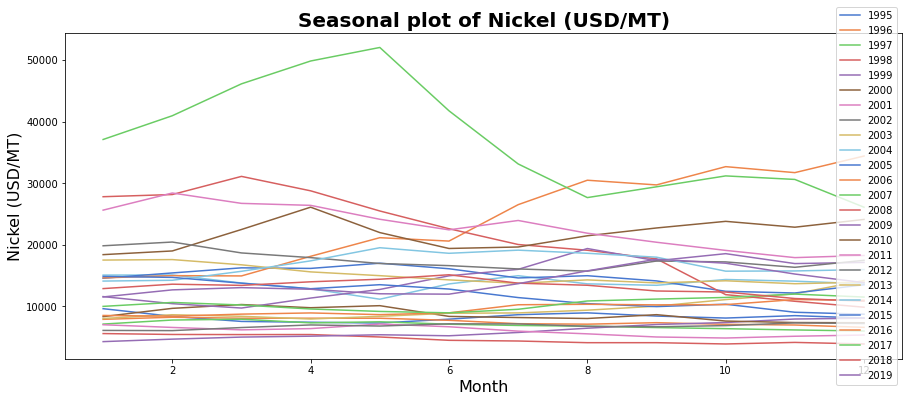

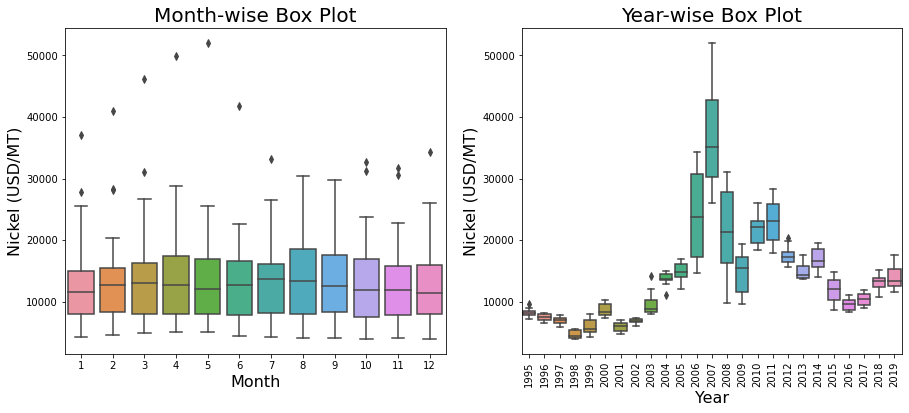

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


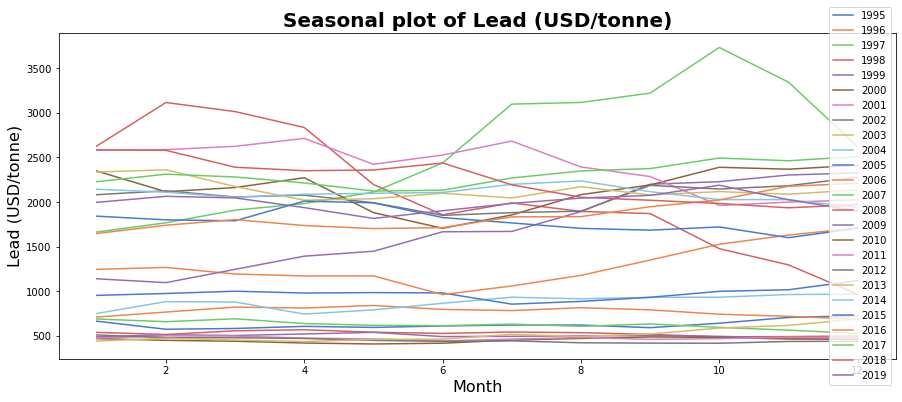

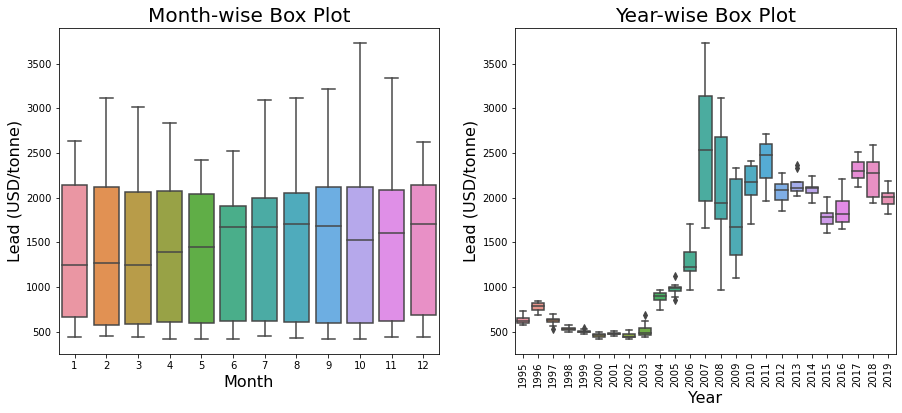

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


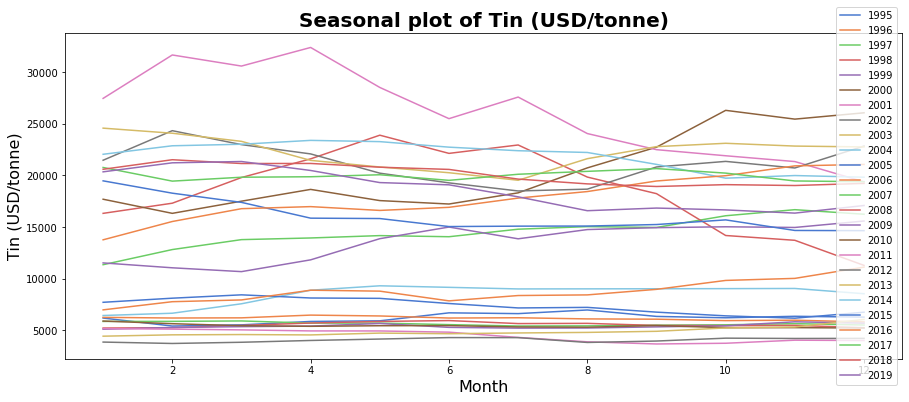

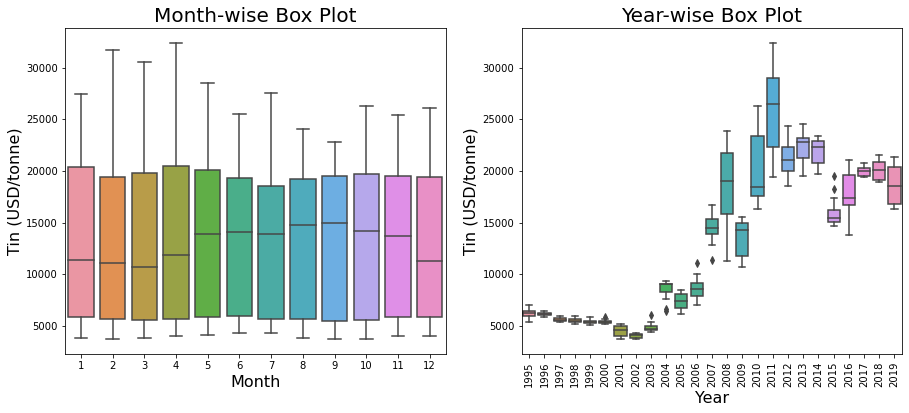

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


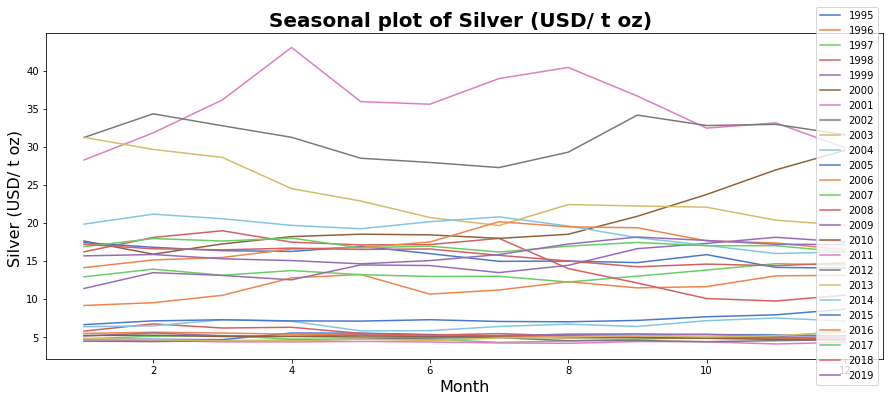

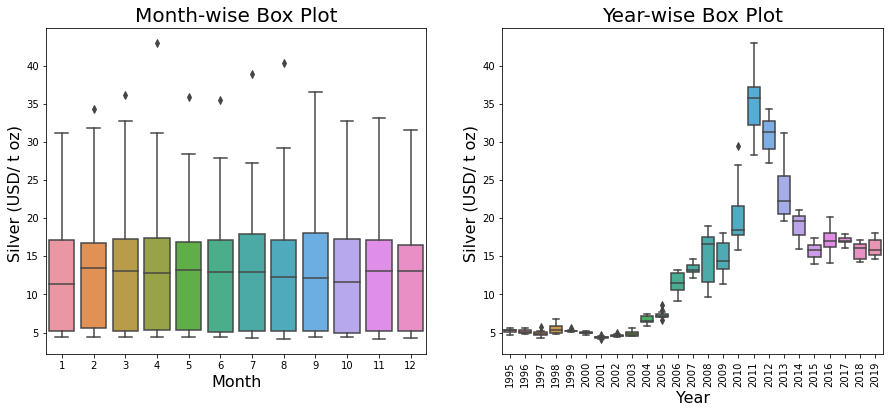

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


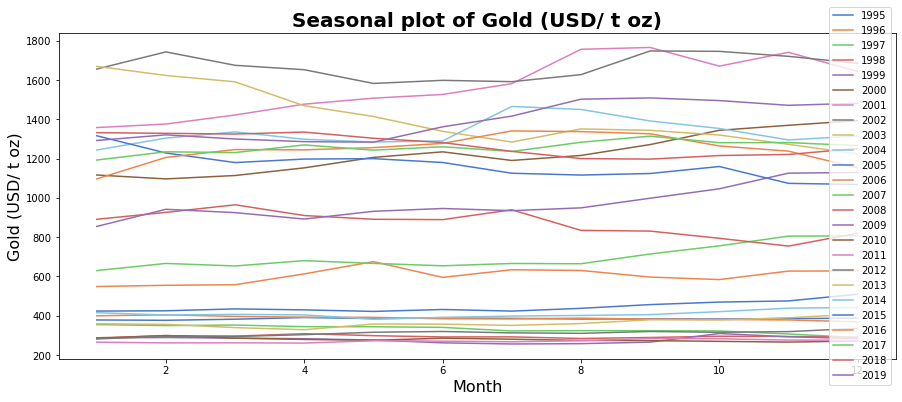

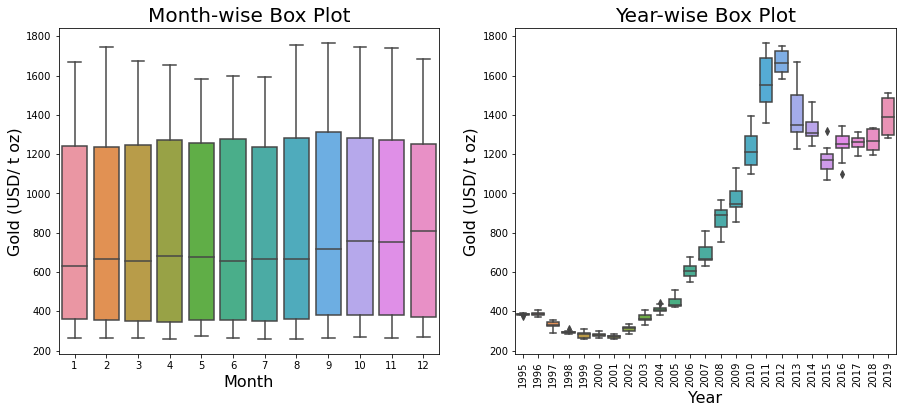

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


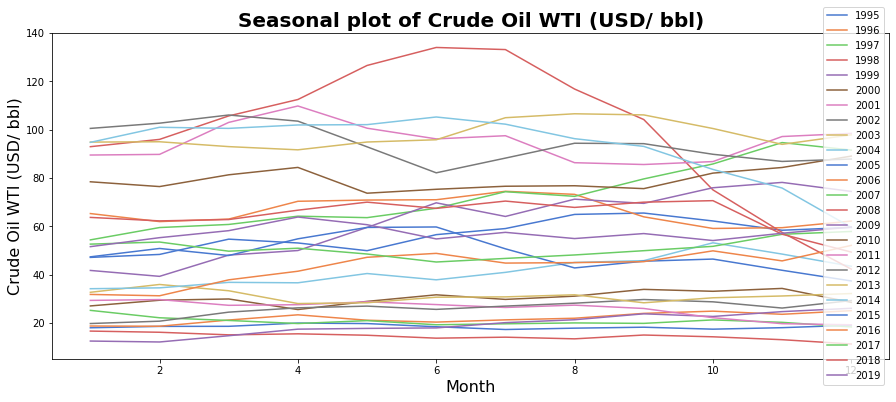

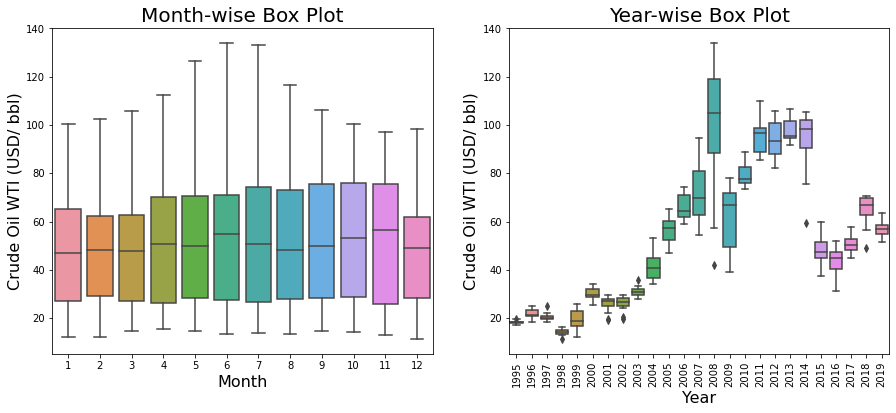

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


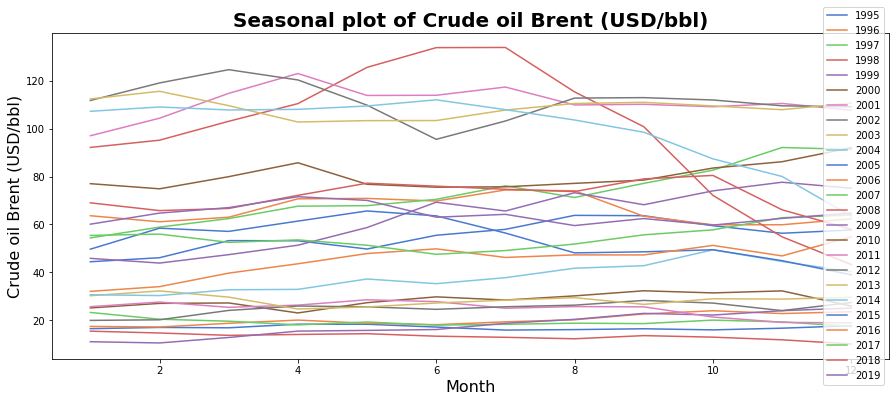

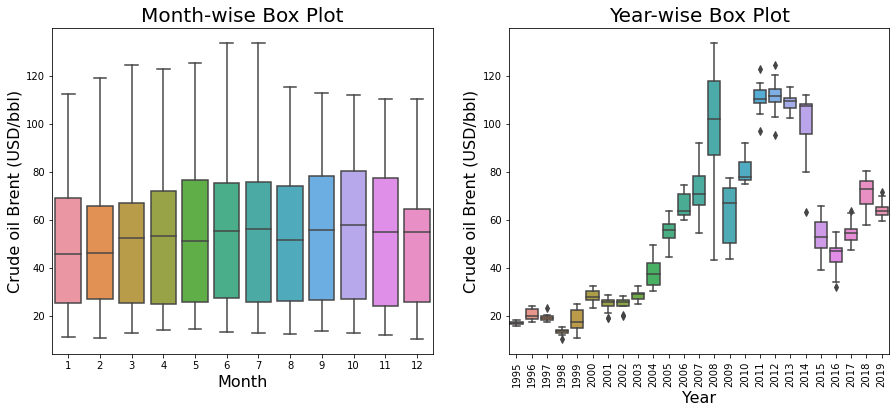

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


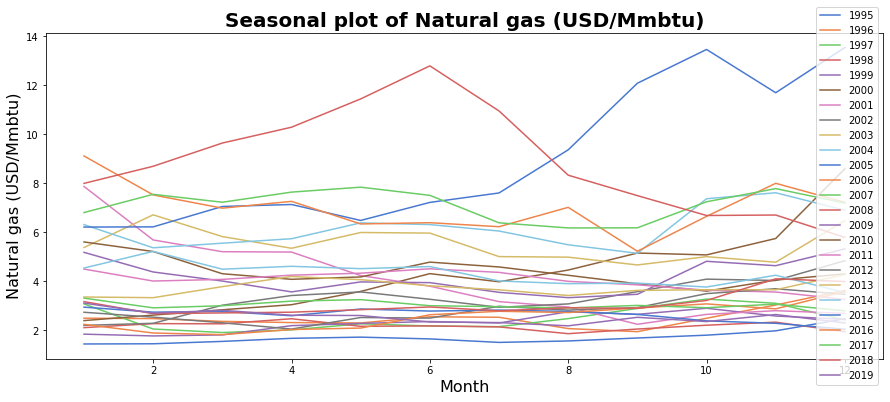

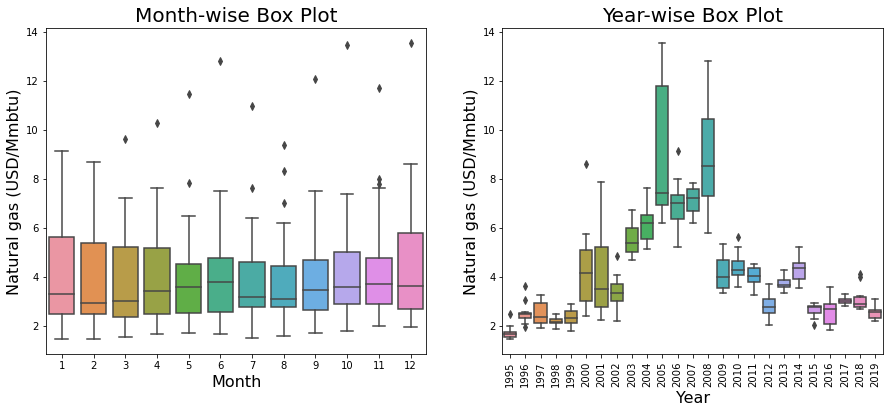

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


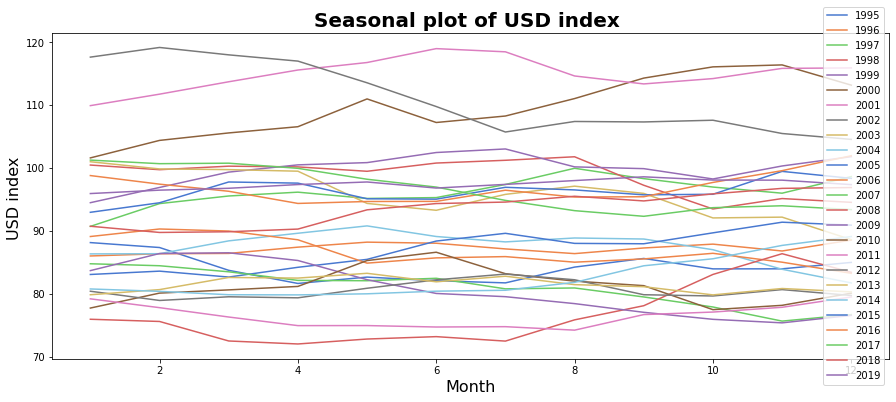

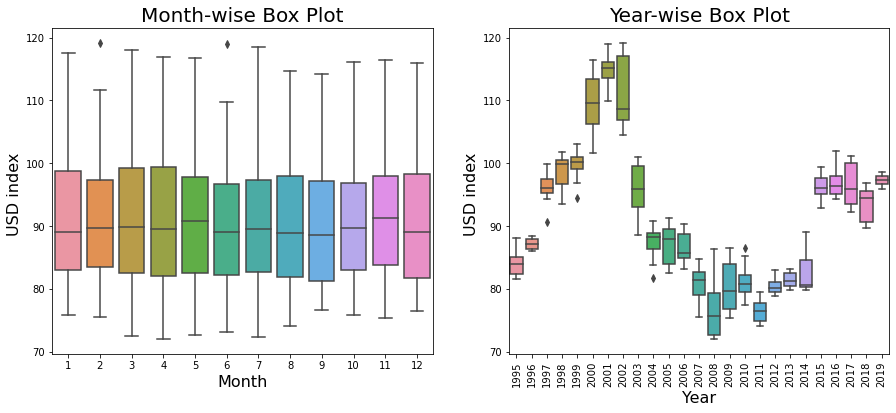

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


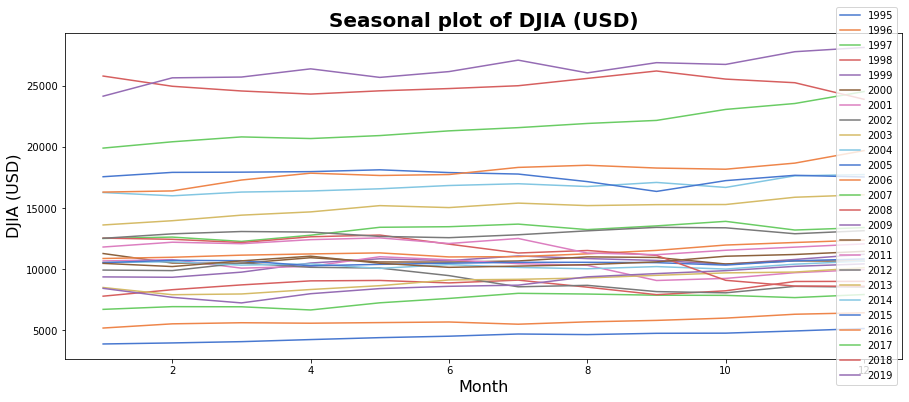

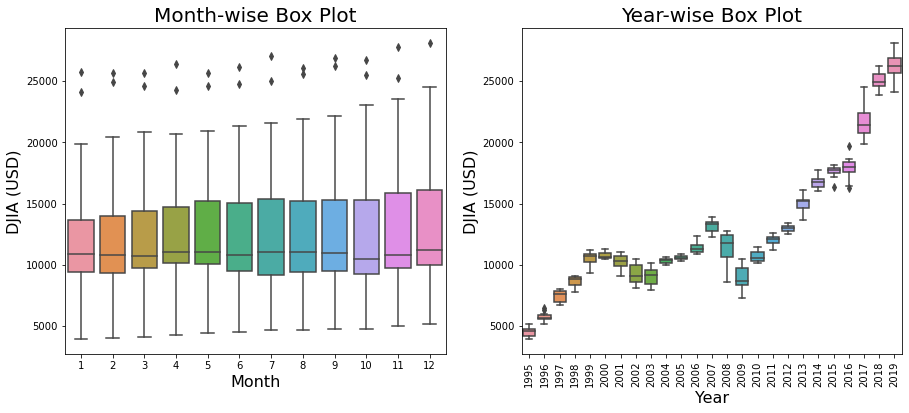

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


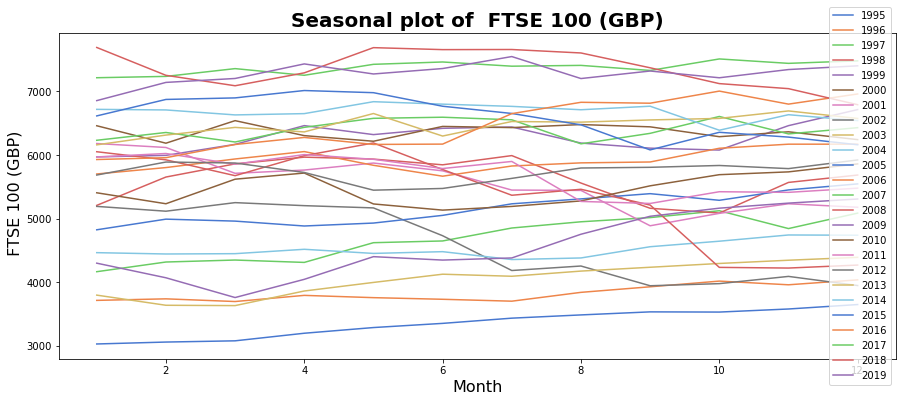

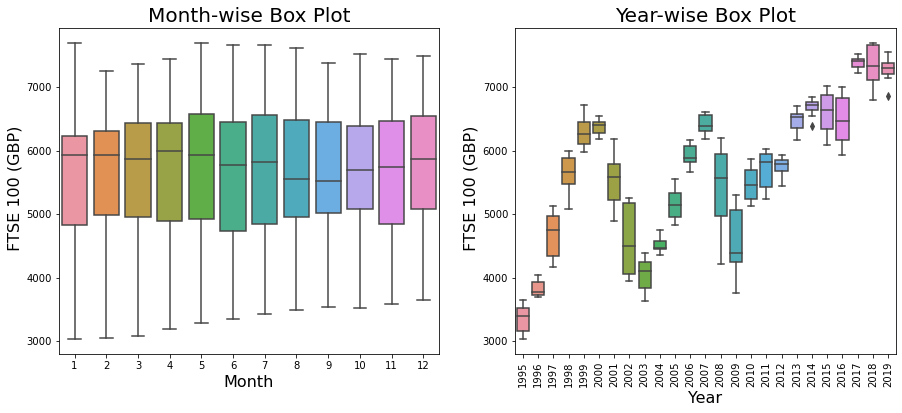

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


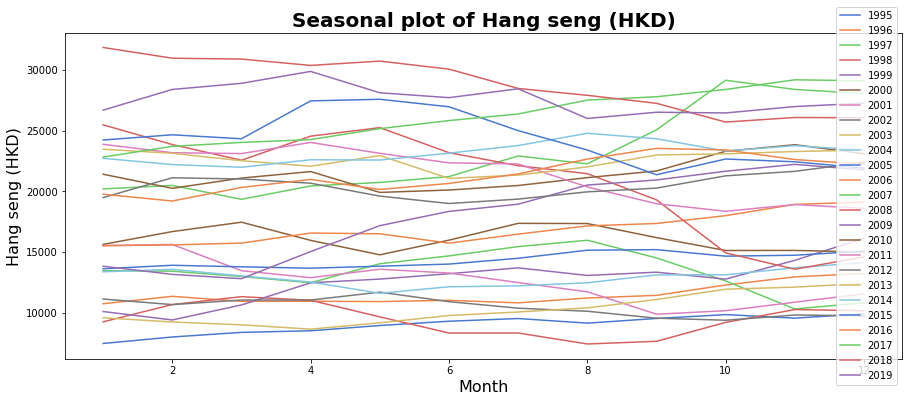

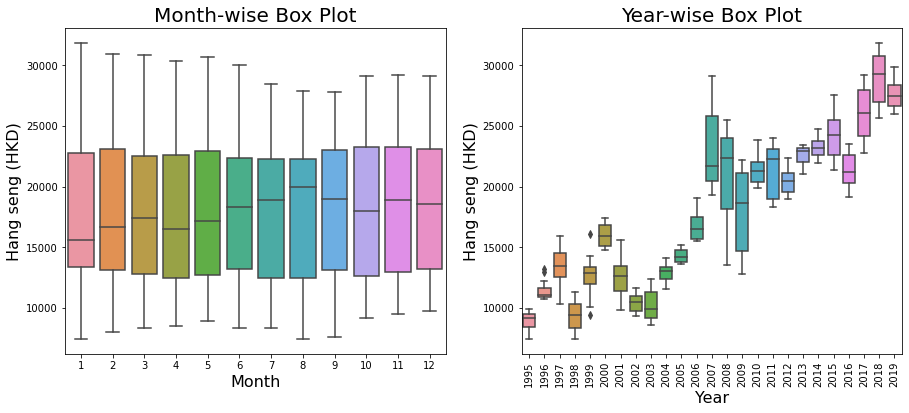

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_29880/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


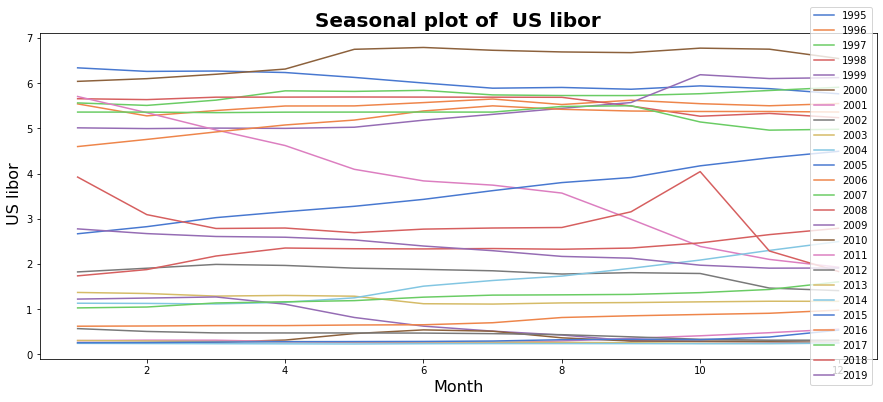

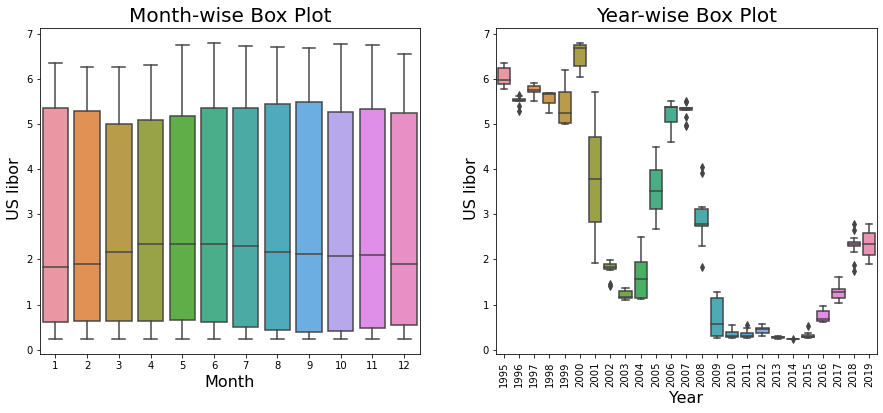

In [12]:
df['Date'] = df.index
for column in df.columns[:-1]:
    season_plot(df, column)